In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Data preparation


In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

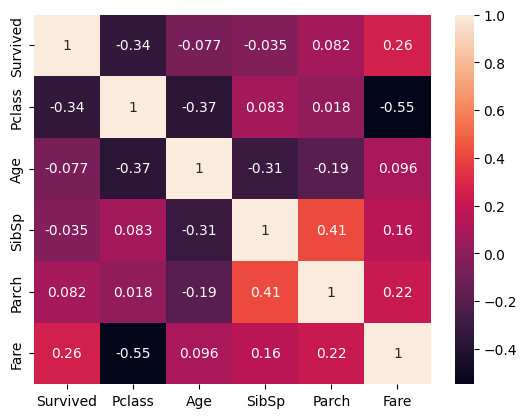

In [5]:
sns.heatmap(
    df_train.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked", "Sex"], axis=1).corr(),
    annot=True,
)

In [6]:
df_train = df_train.drop(["PassengerId", "Name", "Ticket", "Cabin", "Age"], axis=1)
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [7]:
df_train = df_train.dropna()

In [8]:
df_train.shape

(889, 7)

In [9]:
df_train = pd.concat(
    (df_train.drop(["Embarked"], axis=1), pd.get_dummies(df_train["Embarked"])), axis=1
)

In [10]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,0,3,male,1,0,7.2500,False,False,True
1,1,1,female,1,0,71.2833,True,False,False
2,1,3,female,0,0,7.9250,False,False,True
3,1,1,female,1,0,53.1000,False,False,True
4,0,3,male,0,0,8.0500,False,False,True


1 - male, 0 - female


In [11]:
df_train["Sex"] = df_train["Sex"] == "male"
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,0,3,True,1,0,7.2500,False,False,True
1,1,1,False,1,0,71.2833,True,False,False
2,1,3,False,0,0,7.9250,False,False,True
3,1,1,False,1,0,53.1000,False,False,True
4,0,3,True,0,0,8.0500,False,False,True


In [12]:
df_train[["Sex", "C", "Q", "S"]] = df_train[["Sex", "C", "Q", "S"]].astype(int)

In [13]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,0,3,1,1,0,7.2500,0,0,1
1,1,1,0,1,0,71.2833,1,0,0
2,1,3,0,0,0,7.9250,0,0,1
3,1,1,0,1,0,53.1000,0,0,1
4,0,3,1,0,0,8.0500,0,0,1


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   C         889 non-null    int32  
 7   Q         889 non-null    int32  
 8   S         889 non-null    int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 55.6 KB


<Axes: >

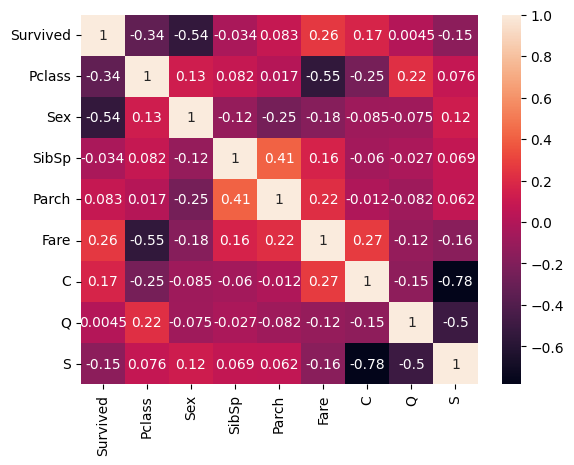

In [15]:
sns.heatmap(df_train.corr(), annot=True)

## Data splitting


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop("Survived", axis=1).to_numpy(),
    df_train["Survived"].to_numpy(),
    test_size=0.2,
    random_state=13,
)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 8), (178, 8), (711,), (178,))

# Model definition


In [18]:
from models import SoftClassifier, DecisionTree

In [19]:
sc = SoftClassifier(threshold=0.75)
dt = DecisionTree(max_depth=100, soft_classifier=sc, soft_threshold=0.95)
dt.fit(X_train, y_train)

In [33]:
our_score = dt.score(X_test, y_test)
our_score

0.7134831460674157

In [21]:
y_pred = dt.predict(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=100, random_state=13)
dtc.fit(X_train, y_train)

std_tree_score = dtc.score(X_test, y_test)
std_tree_y_pred = dtc.predict(X_test)

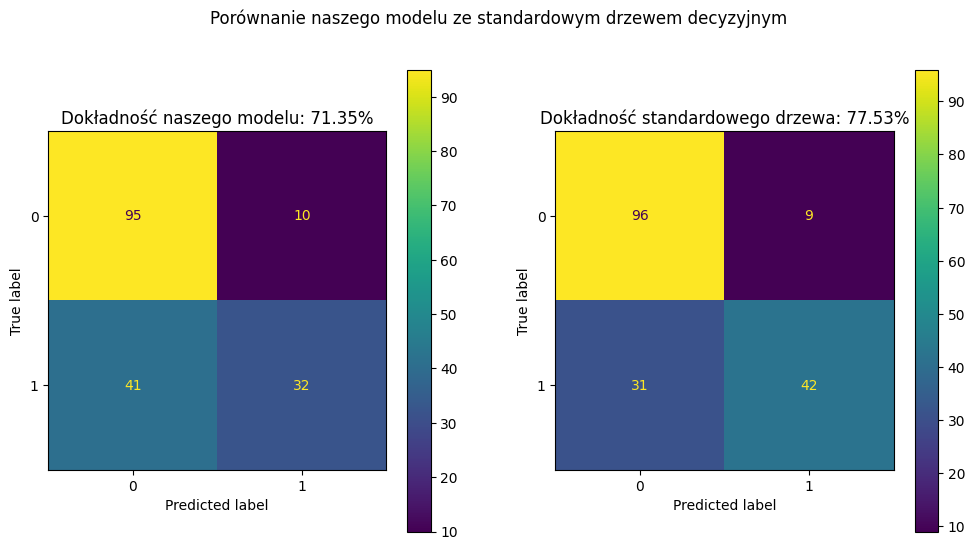

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Porównanie naszego modelu ze standardowym drzewem decyzyjnym")

ax1.set_title(f"Dokładność naszego modelu: {our_score*100:.2f}%")
ax2.set_title(f"Dokładność standardowego drzewa: {std_tree_score*100:.2f}%")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)
ConfusionMatrixDisplay.from_predictions(y_test, std_tree_y_pred, ax=ax2)

plt.show()

In [23]:
import pickle

with open("decision_tree.pickle", "wb") as file:
    pickle.dump(dt, file, protocol=pickle.HIGHEST_PROTOCOL)

with open("soft_classifier.pickle", "wb") as file:
    pickle.dump(sc, file, protocol=pickle.HIGHEST_PROTOCOL)